# Tidene Códigos - Vetorizadores

In [2]:
import gensim
import nltk
import numpy as np
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from bs4 import BeautifulSoup
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /home/bruno/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/bruno/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:

pd_corpus =  pd.read_csv('data/train_complete.csv',encoding='utf8')
pd_corpus , corpus_test =  train_test_split(pd_corpus, train_size=0.7)
classes_train = pd_corpus['sentiment']
corpus = BeautifulSoup(str(pd_corpus['review']), "html.parser").get_text()
print(corpus)
corpus_test = corpus_test['review']



340      One of the most frightening game experiences e...
7057     What on earth has become of our dear Ramu? Is ...
21939    \Crush\" examines female friendship, for the m...
6209     I keep watching this movie over and over and o...
24805    Let me start by saying I have never reviewed a...
17496    This film captures the true struggle with iden...
533      This Worldwide was the cheap man's version of ...
15442    Protocol is an implausible movie whose only sa...
12323    I personally found this movie to be terrible, ...
4753     A very addictive series.I had not seen an exac...
23740    I was duped into seeing this movie after readi...
19796    This is amazing-looking movie with the whole t...
12192    Ok, after reading a couple of reviews on Atlan...
17195    Ignoring (if possible) the tediously gratuitou...
17954    This film has some of the greatest comedic dia...
573      This is a really fun movie. One of those you c...
16520    Gandhi, the Great :Greatness in th...
20348    

/home/bruno/anaconda3/envs/curso/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Classe que encapsula o tipo de tokenização e sequencia de limpeza a ser realizada nos textos

#### Utilitarios - lê corpus e tokenizadores

In [3]:

import csv

class readCorpus(object):
    def __init__(self,csvfile,list_of_fields_to_read=[],tokenizer=None,encoding='utf8'):
        self.csvfile = csvfile
        self.fields = list_of_fields_to_read
        self.tokenizer = tokenizer
        self.encoding = encoding
    
    def __iter__(self):
        f = open(self.csvfile,encoding=self.encoding, errors='ignore')
        reader = csv.reader(f, delimiter=',', quoting=csv.QUOTE_MINIMAL) #separador dos campos\n",
        headers = next(reader, None)
        if (len(self.fields) <= 0):
            self.fields = headers
        selected_field_indexes = []
        for idx,field in enumerate(headers):
            if field in self.fields:
                selected_field_indexes.append(idx)

        for line in reader:
            if line:
                yield [line[idx] for idx in selected_field_indexes] if (len(selected_field_indexes)>1) else (line[selected_field_indexes[0]] if not self.tokenizer else tokenizer.tokenize(line[selected_field_indexes[0]]))
                        

In [4]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import *    #https://www.nltk.org/api/nltk.tokenize.html

class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
        self.tokenizer = nltk.tokenize.RegexpTokenizer("[a-zA-Z']+")
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in self.tokenizer.tokenize(doc) if (len(t)>2)]

class StemTokenizer(object):
    def __init__(self):
        self.stemmer = PorterStemmer()
        self.tokenizer = nltk.tokenize.RegexpTokenizer("[a-zA-Z']+")
    def __call__(self, doc):
        
        return [self.stemmer.stem(t) for t in self.tokenizer.tokenize(doc) if (len(t)>2)]


In [5]:
from nltk.corpus import stopwords
from nltk import download
download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/andreiabonfante/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Visualizando os dados

In [6]:
# Andreia
### O BeautifulSoup PEGOU O TEXTO DE UMA FORMA MUITO ESTRANHA... 
## AQUI USEI O PROPRIO ARQUIVO ... train_min.csv ...

df_corpus = pd.read_csv('data/train_min.csv',encoding='utf8')


In [7]:
# Andreia
# define contagem sentimento (0 - negativo; 1 - positivo)
df_corpus.sentiment.value_counts()


1    3775
0    3725
Name: sentiment, dtype: int64

In [8]:
#Andreia
# recolhe somente os sentimentos negativos
df_corpus[df_corpus.sentiment == 0].head(10)

,id,sentiment,review
0,3013_2,0,Beginning with its long opening shot of seemin...
5,5043_3,0,I am a huge Ziyi Zhang fan and will go to any ...
11,1140_3,0,"Scary, but mostly in the sense that will it be..."
13,7981_4,0,The Rookie suffers from so much. There are the...
16,3166_3,0,I confess to have quite an uneasy feeling abou...
20,2991_4,0,"I am an avid fan of Lucio Fulci, and yet I mus..."
21,8056_1,0,"Inept, boring, and incoherent supernatural \th..."
22,888_4,0,This was a movie i could not wait to see! So i...
29,3265_2,0,I have no idea as to which audience director G...
31,749_1,0,"Nu Image, UFO and others produce films for the..."


### Define um vetorizador do tipo contagem de frequência (bag-of-words)

In [9]:
#Andreia
#http://scikit-learn.org/stable/modules/feature_extraction.html
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(tokenizer=LemmaTokenizer(), stop_words=stop_words) # usa a classe de tokenizacao definida acima
X_train_counts = count_vectorizer.fit_transform(df_corpus.review) # resulta em uma matriz sparsa numpy
print(X_train_counts[0])

  (0, 23825)	1
  (0, 6939)	1
  (0, 2565)	1
  (0, 44966)	1
  (0, 44270)	1
  (0, 11267)	1
  (0, 43131)	1
  (0, 18428)	1
  (0, 25886)	1
  (0, 8042)	1
  (0, 28378)	1
  (0, 23808)	1
  (0, 19949)	1
  (0, 41973)	1
  (0, 24135)	1
  (0, 19826)	1
  (0, 5239)	1
  (0, 38896)	1
  (0, 28945)	1
  (0, 20928)	1
  (0, 34965)	1
  (0, 9813)	1
  (0, 31949)	1
  (0, 11492)	1
  (0, 37792)	1
  :	:
  (0, 27862)	1
  (0, 12880)	1
  (0, 37658)	1
  (0, 41364)	1
  (0, 14105)	1
  (0, 27920)	1
  (0, 20927)	2
  (0, 20539)	1
  (0, 11598)	1
  (0, 36747)	2
  (0, 3673)	1
  (0, 23518)	2
  (0, 25416)	2
  (0, 14958)	1
  (0, 7986)	1
  (0, 44840)	1
  (0, 24208)	1
  (0, 3522)	1
  (0, 34820)	1
  (0, 13879)	1
  (0, 35992)	1
  (0, 36729)	1
  (0, 29139)	1
  (0, 24479)	1
  (0, 4712)	1


#### O vetorizador também pode ser utilizado para transformar um texto não visto

In [10]:
texto_nao_visto = count_vectorizer.transform(['New film review'])
print(texto_nao_visto)

  (0, 15570)	1
  (0, 28174)	1
  (0, 34138)	1


#### A partir daí temos

In [11]:
# Andreia
print("Formato Matriz sparsa gerada (numdocs,features) ==> ", X_train_counts.shape)
print("Indice de uma palavra ('film') ==>", count_vectorizer.vocabulary_.get('film'))
print("Representacao de um documento (o 6º) ==> ", X_train_counts[5])


Formato Matriz sparsa gerada (numdocs,features) ==>  (7500, 45491)
Indice de uma palavra ('film') ==> 15570
Representacao de um documento (o 6º) ==>    (0, 15630)	1
  (0, 30020)	1
  (0, 15322)	1
  (0, 28856)	1
  (0, 36298)	1
  (0, 36287)	1
  (0, 12538)	1
  (0, 3003)	1
  (0, 1867)	1
  (0, 2473)	1
  (0, 37468)	2
  (0, 11968)	1
  (0, 42069)	1
  (0, 42481)	1
  (0, 11790)	1
  (0, 35982)	1
  (0, 16282)	1
  (0, 24509)	1
  (0, 38537)	1
  (0, 31850)	1
  (0, 33703)	1
  (0, 23046)	1
  (0, 17614)	1
  (0, 42337)	1
  (0, 11797)	1
  :	:
  (0, 41161)	1
  (0, 35975)	1
  (0, 15065)	1
  (0, 45388)	2
  (0, 45430)	2
  (0, 20040)	1
  (0, 44043)	1
  (0, 2446)	2
  (0, 36989)	1
  (0, 37788)	1
  (0, 19818)	1
  (0, 44685)	2
  (0, 25423)	1
  (0, 9774)	2
  (0, 27435)	2
  (0, 43740)	5
  (0, 18428)	1
  (0, 24135)	1
  (0, 38744)	1
  (0, 15570)	7
  (0, 27480)	2
  (0, 40931)	3
  (0, 28167)	1
  (0, 13879)	1
  (0, 36729)	1


#### Explorando as contagens (palavras mais frequentes no texto)

In [14]:
# Andreia
# Frequencia total
sum_words = X_train_counts.sum(axis=0)    #bag_of_words
words_freq_total = [(word, sum_words[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()] #formato saida [(termo,frequencia),...]
words_freq_total =sorted(words_freq_total, key = lambda x: x[1], reverse=True) #ordena

df_words_freq = pd.DataFrame([[word,freqtot] for word,freqtot in words_freq_total],columns=['word','total'])
#print(df_words_freq)

### Curva de Zipf e Cortes de Luhn
#### A lei de Zipf diz que a frequência das palavras em um documento é inversamente proporcional ao seu ranqueamento. Ou seja, a palavra mais frequente vai aparecer com frequência duas vezes maior que a segunda mais frequente, três vezes que a terceira, e assim por diante. 
#### Luhn argumentou que as palavras muito frequentes e as pouco frequentes não colaboram para discriminação e similaridade entre documentos. 
##### https://bibliotecadigital.fgv.br/dspace/bitstream/handle/10438/14593/TEXTO%20DISSERTA%C3%87%C3%83O%20VFINAL1.pdf


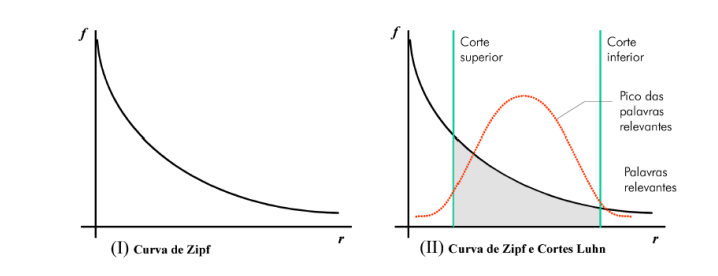

Text(0.5,1,'Termos mais frequentes')

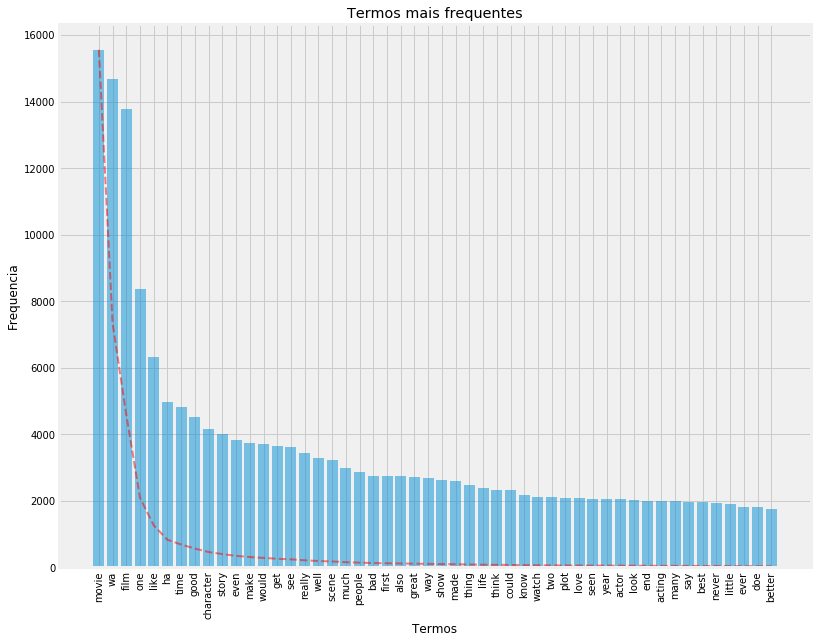

In [15]:
#Andreia
# 50 termos mais frequentes

nfreq = 50

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
#%config InlineBackend.figure_format = 'retina'

s = 1
y_pos = np.arange(nfreq)
plt.figure(figsize=(12,10)) 

## termos mais frequentes com curva de zipf - pontilhado
expected_zipf = [df_words_freq['total'][i]/(i+1)**s for i in y_pos]

plt.bar(y_pos, df_words_freq['total'][:nfreq], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.xticks(y_pos, df_words_freq['word'][:nfreq],rotation='vertical')
plt.ylabel('Frequencia')
plt.xlabel('Termos')
plt.title('Termos mais frequentes')

In [16]:
# Andreia
# implementando cortes de Luhn - termos mais significativos

import powerlaw
fit = powerlaw.Fit(df_words_freq['total'])
mediana = fit.xmin*np.power(2, 1/(fit.power_law.alpha-1))
df_max = int(np.round(np.power(mediana, 4/3)))
df_min = int(np.round(np.power(mediana, 2/3)))
print("frequencia maxima encontrada: ",df_max)
print("frequencia minima encontrada: ",df_min)



Calculating best minimal value for power law fit
/home/andreiabonfante/anaconda3/envs/analises/lib/python3.7/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


frequencia maxima encontrada:  93
frequencia minima encontrada:  10


In [17]:
# Andreia

# monta um vetorizador com frequencia minima e maxima encontrada no corte de luhn
luhn_count_vectorizer = CountVectorizer(min_df=df_min,max_df=df_max, tokenizer=LemmaTokenizer(), stop_words=stop_words) # usa a classe de tokenizacao definida acima
df_corpus = pd.read_csv('data/train_min.csv',encoding='utf8')
l_counts = luhn_count_vectorizer.fit_transform(df_corpus.review)  #df_corpus.review[df_corpus.sentiment==0])

# Frequencia total
l_sum_words = l_counts.sum(axis=0)    #bag_of_words
l_words_freq_total = [(word, l_sum_words[0, idx]) for word, idx in luhn_count_vectorizer.vocabulary_.items()]
l_words_freq_total =sorted(l_words_freq_total, key = lambda x: x[1], reverse=True)


Text(0.5,1,'Termos apos cortes de Luhn')

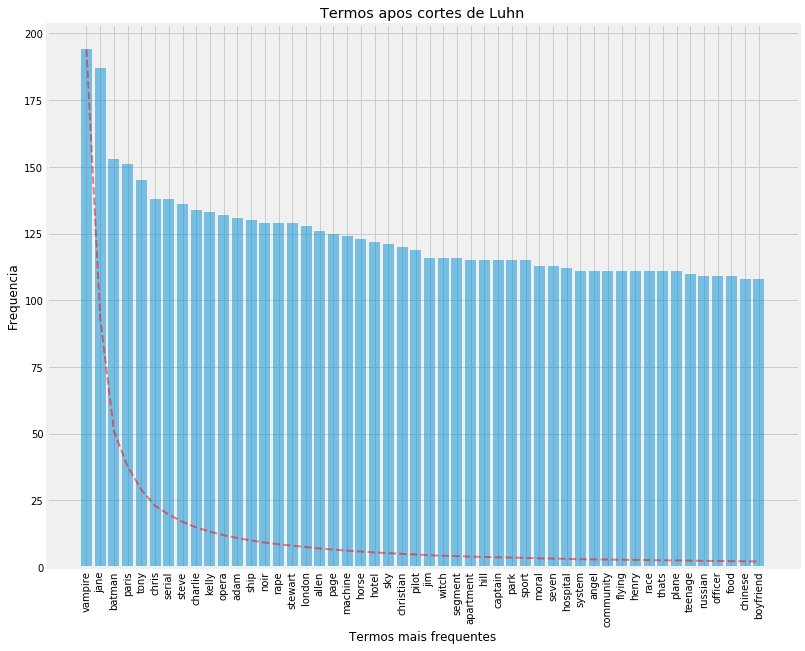

In [18]:
# Andreia
# termos mais frequentes
nfreq = 50
y_pos = np.arange(nfreq)
plt.figure(figsize=(12,10))
w = [w for w,f in l_words_freq_total]
f = [f for w,f in l_words_freq_total]

## termos mais frequentes com curva de zipf - pontilhado
expected_zipf = [f[i]/(i+1)**s for i in y_pos]

plt.bar(y_pos, f[:nfreq], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.xticks(y_pos, w[:nfreq],rotation='vertical')
plt.ylabel('Frequencia')
plt.xlabel('Termos mais frequentes')
plt.title('Termos apos cortes de Luhn')


In [19]:
#Andreia
# frequencia por sentimento negativo
neg_count_vectorizer = CountVectorizer(min_df=df_min,max_df=df_max,tokenizer=LemmaTokenizer(), stop_words=stop_words) # usa a classe de tokenizacao definida acima
neg_counts = neg_count_vectorizer.fit_transform(df_corpus.review[df_corpus.sentiment==0]) # resulta em uma matriz sparsa numpy
neg_sum_words = neg_counts.sum(axis=0)    #bag_of_words
neg_words_freq = [(word, neg_sum_words[0, idx]) for word, idx in neg_count_vectorizer.vocabulary_.items()]
neg_words_freq =sorted(neg_words_freq, key = lambda x: x[1], reverse=True)
print(neg_words_freq)

[('vampire', 151), ('documentary', 142), ('slasher', 128), ('king', 128), ('creature', 126), ('remake', 125), ('musical', 124), ('alien', 123), ('british', 118), ('ghost', 118), ('reality', 118), ('gay', 116), ('fake', 112), ('television', 112), ('island', 111), ('jack', 111), ('drug', 111), ('cartoon', 111), ('sexual', 111), ('french', 110), ('creepy', 109), ('whose', 109), ('footage', 108), ('baby', 107), ('david', 107), ('surprise', 107), ('cause', 107), ('joe', 106), ('husband', 106), ('victim', 105), ('cover', 105), ('george', 105), ('lee', 105), ('season', 105), ('doctor', 104), ('important', 104), ('street', 103), ('named', 103), ('ask', 103), ('teen', 103), ('team', 103), ('soldier', 103), ('fighting', 103), ('image', 102), ('james', 102), ('secret', 102), ('attack', 102), ('check', 102), ('yeah', 102), ('channel', 101), ('outside', 101), ('list', 101), ('crime', 101), ('hot', 101), ('adult', 101), ('tale', 100), ('subject', 100), ('modern', 100), ('force', 100), ('depth', 100)

In [20]:
#Andreia
# frequencia por sentimento positivo
pos_count_vectorizer = CountVectorizer(min_df=df_min,max_df=df_max,tokenizer=LemmaTokenizer(), stop_words=stop_words) # usa a classe de tokenizacao definida acima
pos_counts = pos_count_vectorizer.fit_transform(df_corpus.review[df_corpus.sentiment==1]) # resulta em uma matriz sparsa numpy
pos_sum_words = pos_counts.sum(axis=0)    #bag_of_words
pos_words_freq = [(word, pos_sum_words[0, idx]) for word, idx in pos_count_vectorizer.vocabulary_.items()]
pos_words_freq =sorted(pos_words_freq, key = lambda x: x[1], reverse=True)
print(pos_words_freq)

[('match', 185), ('japanese', 138), ('tom', 134), ('dog', 133), ('battle', 120), ('bill', 118), ('western', 118), ('studio', 116), ('jane', 116), ('creepy', 115), ('stage', 115), ('german', 114), ('joe', 113), ('cop', 113), ('animal', 113), ('scary', 112), ('master', 112), ('kelly', 112), ('soldier', 111), ('south', 111), ('player', 109), ('disney', 109), ('animated', 108), ('fear', 108), ('stewart', 108), ('ben', 107), ('cartoon', 106), ('tony', 106), ('journey', 106), ('spirit', 106), ('cry', 105), ('office', 105), ('gun', 105), ('issue', 104), ('project', 104), ('screenplay', 104), ('gore', 104), ('singing', 103), ('copy', 103), ('manages', 103), ('sci', 103), ('spoiler', 103), ('die', 103), ('noir', 102), ('popular', 102), ('fighting', 102), ('lee', 102), ('stupid', 102), ('student', 101), ('general', 101), ('memory', 101), ('baby', 101), ('crazy', 101), ('sequel', 101), ('ten', 101), ('ring', 101), ('political', 101), ('provides', 100), ('trouble', 100), ('drug', 100), ('portrayed

In [21]:
# Andreia 
# monta um dicionario de cada palavra com sua contagem (negativas e positivas)
neg_dict = {}
for word, count in neg_words_freq:
    neg_dict[word] = count
pos_dict = {}    
for word, count in pos_words_freq:
    pos_dict[word] = count

In [22]:
#Andreia
# cria um dataframe com as contagens positiva, negativa e total de cada termo
df_words_freq = pd.DataFrame([[word,pos_dict[word] if word in pos_dict else 0, neg_dict[word] if word in neg_dict else 0, freqtot] for word,freqtot in l_words_freq_total],columns=['word','pos','neg','total'])
print(df_words_freq)

               word  pos  neg  total
0           vampire   43  151    194
1              jane  116   71    187
2            batman   88   65    153
3             paris   97   54    151
4              tony  106   39    145
5             chris   75   63    138
6            serial   77   61    138
7             steve   63   73    136
8           charlie   82   52    134
9             kelly  112   21    133
10            opera   76   56    132
11             adam   75   56    131
12             ship   50   80    130
13             noir  102   27    129
14             rape   49   80    129
15          stewart  108   21    129
16           london   64   64    128
17            allen   80   46    126
18             page   81   44    125
19          machine   54   70    124
20            horse   62   61    123
21            hotel   76   46    122
22              sky   74   47    121
23        christian   46   74    120
24            pilot   70   49    119
25              jim   80   36    116
2

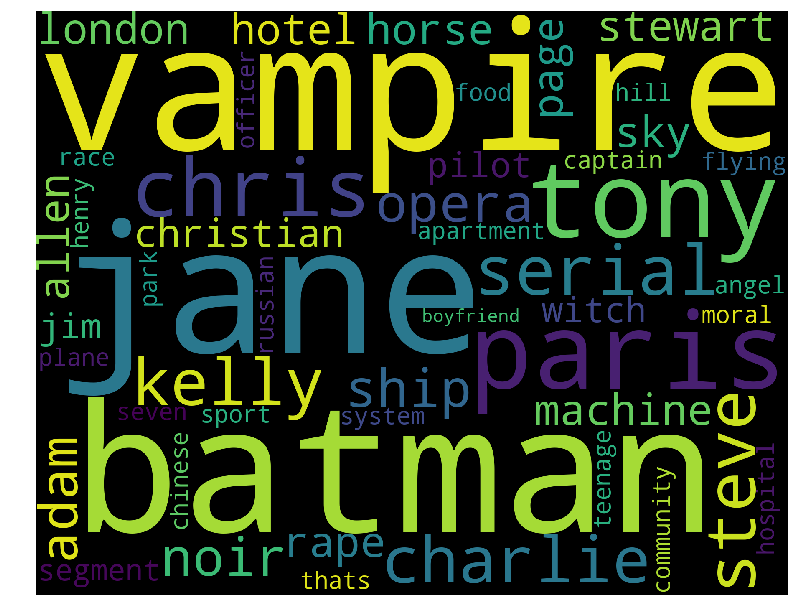

In [23]:
# Andreia
# visualizando as palavras mais frequentes
### instalar os pacotes 
#sudo apt-get install libpython3-dev
# pillow, numpy, anaconda - pip install 
# depois no env conda install -c https://conda.anaconda.org/conda-forge wordcloud
import wordcloud
from wordcloud import WordCloud, STOPWORDS 

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import random

#https://github.com/amueller

width = 12
height = 12
plt.figure(figsize=(width, height))
wordcloud = WordCloud(width=1800,height=1400).generate(' '.join(df_words_freq['word'][0:50]))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


### Define um vetorizador do tipo contagem de frequência de bi-gramas (na tentativa de juntar palavras que aparecem sempre juntas)


In [24]:
#http://scikit-learn.org/stable/modules/feature_extraction.html
from sklearn.feature_extraction.text import CountVectorizer

bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), tokenizer=LemmaTokenizer(), stop_words='english', min_df=1)

In [159]:
#Andreia
#corpus = readCorpus("toy.csv",list_of_fields_to_read=['data'])
X_train_bigram_counts = bigram_vectorizer.fit_transform(df_corpus.review) # resulta em uma matriz sparsa numpy
#print('Dicionario: %s' %bigram_vectorizer.get_feature_names())

#### Explorando as contagens (palavras mais frequentes no texto)

In [160]:
# https://medium.com/@cristhianboujon/how-to-list-the-most-common-words-from-text-corpus-using-scikit-learn-dad4d0cab41d
sum_bigrams = X_train_bigram_counts.sum(axis=0)    #bag_of_words
bigram_freq = [(bigram, sum_bigrams[0, idx]) for bigram, idx in bigram_vectorizer.vocabulary_.items()]
bigram_freq =sorted(bigram_freq, key = lambda x: x[1], reverse=True)

In [161]:
bigram_freq

[('movie wa', 916),
 ('film wa', 659),
 ("i've seen", 531),
 ('look like', 469),
 ('year old', 395),
 ('special effect', 338),
 ("don't know", 327),
 ('movie like', 307),
 ('film ha', 287),
 ('movie ha', 278),
 ('wa just', 275),
 ('low budget', 270),
 ('good movie', 268),
 ('wa good', 258),
 ('horror movie', 251),
 ('main character', 246),
 ('waste time', 237),
 ("i'm sure", 235),
 ("it's just", 231),
 ('thought wa', 228),
 ('horror film', 228),
 ('watch movie', 224),
 ('make movie', 217),
 ('movie just', 204),
 ('bad guy', 204),
 ('year ago', 200),
 ('like movie', 200),
 ('film like', 200),
 ("don't think", 198),
 ('new york', 197),
 ('acting wa', 197),
 ('wa really', 192),
 ('bad movie', 189),
 ('worst movie', 186),
 ('feel like', 186),
 ('real life', 186),
 ('make sense', 184),
 ('watching movie', 184),
 ('high school', 184),
 ('movie movie', 172),
 ('story line', 171),
 ('wa great', 170),
 ("movie it's", 168),
 ('good film', 166),
 ('pretty good', 165),
 ("film it's", 162),
 ('time

### Define um vetorizador do tipo TFIDF

In [162]:
# http://scikit-learn.org/stable/modules/feature_extraction.html
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(tokenizer=LemmaTokenizer(), stop_words='english', min_df=1)

#### Cria um vetorizador já ajustado ao texto

In [165]:
# Andreia
import pandas as pd
import pickle

#corpus = readCorpus("toy.csv",list_of_fields_to_read=['data'])
#classes = pd_corpus['sentiment'].values.tolist()
classes = df_corpus['sentiment'].values.tolist() 

## NOS OUTROS EXEMPLOS ESSAS DUAS ACOES (FIT E TRANSFORM) SAO FEITAS EM UMA SO, ATRAVES DO FIT_TRANSFORM ..
##   FIZ A SEPARACAO AQUI PARA PODER GRAVAR NO DISCO O VETORIZADOR E PODER USA-LO PARA VETORIZAR TEXTOS NOVOS DEPOIS
tfidf_vectorizer = tfidf_vectorizer.fit(df_corpus.review,classes) # treina o vetorizador
X_train_tfidf = tfidf_vectorizer.transform(df_corpus.review) # transforma os textos em uma matriz sparsa numpy

# gravando no disco vetorizador e a matriz vetorizada
pickle.dump(tfidf_vectorizer, open("tfidf_vectorizer.pickle", "wb"))
pickle.dump(X_train_tfidf, open("X_train_tfidf.pickle", "wb"))

In [167]:
print("Formato Matriz sparsa gerada (numdocs,features) ==> ", X_train_tfidf.shape)
print("Indice de uma palavra, por exemplo: 'film'==>", tfidf_vectorizer.vocabulary_.get('film'))


Formato Matriz sparsa gerada (numdocs,features) ==>  (7500, 45347)
Indice de uma palavra, por exemplo: 'film'==> 15519


In [168]:
print("Representacao de um documento ==> ", X_train_tfidf[5])

Representacao de um documento ==>    (0, 45286)	0.32635230610186616
  (0, 45244)	0.29853170761710535
  (0, 43906)	0.04674749379683167
  (0, 43752)	0.08035150062557442
  (0, 43601)	0.14397226216969383
  (0, 42345)	0.07955818311404264
  (0, 42201)	0.11330825189318945
  (0, 41933)	0.10099266504896441
  (0, 41031)	0.08466842457020585
  (0, 40802)	0.11398958831014433
  (0, 40232)	0.0685736003255668
  (0, 38422)	0.10025205260073244
  (0, 38409)	0.130219401783318
  (0, 38362)	0.11764748636789449
  (0, 37387)	0.12274043500115721
  (0, 37359)	0.20960602416189064
  (0, 37296)	0.08493780203403077
  (0, 37025)	0.10039800466029877
  (0, 36884)	0.08923033339309333
  (0, 36825)	0.1214452553237919
  (0, 36623)	0.06833504393866732
  (0, 36479)	0.12778389330173212
  (0, 36191)	0.18522345572391588
  (0, 36180)	0.08040552036137993
  (0, 35881)	0.07221449719497199
  :	:
  (0, 18363)	0.03866786220980758
  (0, 17549)	0.060089642740430035
  (0, 17049)	0.09321086239075402
  (0, 16224)	0.09300712135415308
  (0,

In [ ]:
print('Dicionario: %s' %tfidf_vectorizer.get_feature_names())

#### Explorando os dados (ordenando as palavras com maior tfidf nos documentos)

In [169]:
# https://medium.com/@cristhianboujon/how-to-list-the-most-common-words-from-text-corpus-using-scikit-learn-dad4d0cab41d
sum_idfs = X_train_tfidf.sum(axis=0)    #tfidfs
words_idfs = [(word, sum_idfs[0, idx]) for word, idx in tfidf_vectorizer.vocabulary_.items()]
words_idfs =sorted(words_idfs, key = lambda x: x[1], reverse=True)

In [170]:
words_idfs

[('movie', 418.56076055249787),
 ('wa', 357.07020105625344),
 ('film', 343.4045473197315),
 ('like', 177.03840920387998),
 ("it's", 165.57561762331287),
 ('just', 165.20486912635593),
 ('good', 155.19388030620914),
 ('time', 149.53172065850626),
 ('ha', 141.87248900343815),
 ('story', 140.70404840668505),
 ('character', 137.72910877889058),
 ('really', 130.3719426267485),
 ('make', 125.06756393987234),
 ('bad', 121.16490502352094),
 ('great', 115.00770823879618),
 ('scene', 114.79214303020596),
 ('people', 112.83588832040294),
 ("don't", 106.97308451758373),
 ('watch', 100.93259537827622),
 ('think', 99.57317736777847),
 ('way', 97.48707034330648),
 ('thing', 96.53799867840125),
 ('seen', 94.19278448128311),
 ('plot', 93.76741068344421),
 ('acting', 93.33702389632418),
 ('actor', 92.01986495221738),
 ('life', 91.0681599778387),
 ('love', 90.26385036029289),
 ('know', 88.26934132343057),
 ('did', 84.31287405729418),
 ('best', 84.20684414894335),
 ('say', 83.54508870053247),
 ('year', 82

## Vetorização com o word2vec do Gensim

In [ ]:
# utilizando um modelo word2vec previamente construido
import gensim.downloader as api
word_vectors = api.load("glove-wiki-gigaword-100")

In [ ]:
#https://radimrehurek.com/gensim/models/word2vec.html
# representacao de uma palavra no formato word2vec = representado na dimensao 100 do modelo utilizado
print(word_vectors.get_vector('film'))

In [ ]:
## NAO UTILIZAR COM TOKENS STEMMIZADOS = PQ ELE NAO ACHARA MUITAS PALAVRAS
import numpy as np
class Word2VecVectorizer:
  def __init__(self,word_vectors):
    self.word_vectors = word_vectors

  def fit(self, lst_tokens):
    pass

  # para cada sentenca tokenizada ele representa cada palavra segundo a 
    #representacao w2v e depois tira a media de todas as palavras da sentenca
  def transform(self, lst_tokens): #pega uma lista de tokens
    self.D = word_vectors.get_vector(word_vectors.index2word[0]).shape[0]
    X = np.zeros((len(lst_tokens), self.D))
    n = 0
    emptycount = 0
    for tokens in lst_tokens:
      vecs = []
      m = 0
      for word in tokens:
        try:
            vec = self.word_vectors.get_vector(word)
            vecs.append(vec)
            m += 1
        except KeyError:
            #print('Palavra ',word,' nao pode ser representada')
            pass
      if len(vecs) > 0:
        vecs = np.array(vecs)
        X[n] = vecs.mean(axis=0)
      else:
        emptycount += 1
      n += 1
    return X


  def fit_transform(self, lst_tokens):
    self.fit(lst_tokens)
    return self.transform(lst_tokens)

### Utilizando vetorizar os textos

In [ ]:
# usa o dictionario e o bowcorpus para recuperar os tokens
# lembrando que o bowcorpus nao devera ser construido com stems ..ele pode nao conseguir representar muitas palavras
dictionary = gensim.corpora.Dictionary.load("dictionary.dict") #carrega o dicionario do disco
idx2wordDictionary = {k:v for k, v in dictionary.iteritems()} #mudando a ordem dos indices
lem = LemmaTokenizer()
bowcorpus = gensim.corpora.MmCorpus('bowcorpus.mm') # le o corpus representado em bag-of-words
tokens = [[idx2wordDictionary[idx] for idx,freq in text] for text in bowcorpus]
print(tokens[0])

In [ ]:
w2v_vectorizer_glove_wiki_gigaword_100 = Word2VecVectorizer(word_vectors)

X_train_w2v_glove_wiki_gigaword_100 = w2v_vectorizer_glove_wiki_gigaword_100.fit_transform(tokens)

#np.save('w2vmatrix.npy', textos_vetorizados) # salvando no disco

# gravando no disco vetorizador e a matriz vetorizada
pickle.dump(X_train_w2v_glove_wiki_gigaword_100, open("X_train_w2v_glove_wiki_gigaword_100.pickle", "wb"))



In [ ]:
print(X_train_w2v_glove_wiki_gigaword_100[0]) #textos_vetorizados[0])

In [ ]:
X_train_w2v_glove_wiki_gigaword_100.shape

#### Transformando textos de teste

In [ ]:
#corpus_test = readCorpus("testtoy.csv",list_of_fields_to_read=['data'])

lem = LemmaTokenizer()

test_lem_tokens = [lem(texto) for texto in corpus_test]
print(test_lem_tokens[0])


In [ ]:
X_test_w2v_glove_wiki_gigaword_100 = w2v_vectorizer_glove_wiki_gigaword_100.fit_transform(test_lem_tokens)

# gravando no disco vetorizador e a matriz vetorizada
pickle.dump(X_test_w2v_glove_wiki_gigaword_100, open("X_test_w2v_glove_wiki_gigaword_100.pickle", "wb"))

